# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import bokeh.plotting as bkp  #NOTE: I could not load this module, so I commented it out.
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Jonathon.Poage\Miniconda2\envs\py34\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


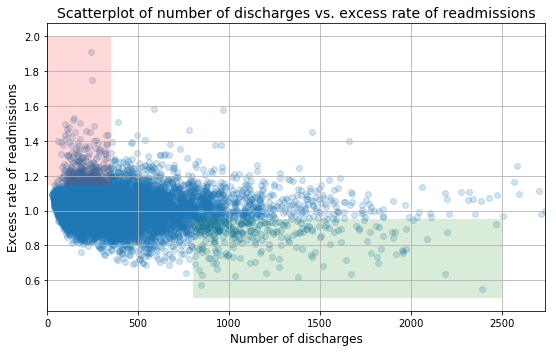

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A

I do not agree with the above analysis and recommendations.  The scatterplot as it is presented does not provide enough information to support the initial observations.  The points in the plot overlap, making it difficult to visualize the full distribution well enough to determine whether there is a downward trend.  

The green region contains some of the lowest Excess Readmission Ratio (ERR) values, and the red region contains some of the highest ERR values, but it is difficult to visually determine the total number of data points in various regions in the plot.  Also, the green region does not extend vertically, and it excludes many data points with a high number of discharges. Conclusions drawn from the green region do not necessarily represent all of the data points with a higher number of discharges.  Similarly, the red region does not necessarily represent all of the data points with a lower number of discharges.  

The statistics presented are useful, but I would prefer to see more values included for each of the two cases.  The means are influenced by extreme values, so it may be useful to include the medians in order to give a more complete indication of the central tendencies.  It may be useful to present quantiles as well, to give more information about the shapes of the distributions.  It would also be useful to explore these statistics for other regions besides the two presented. 

The conclusions are not justified by the analysis as it is presented.  The analysis does not evaluate a correlation coefficient, and so no conclusions can be made about the strength or significance of the correlation between the number of discharges and the ERR.  Furthermore, the analysis does not explore the size of the hospitals nor their number of resources.  No conclusions can be made from this analysis about the causal relationship between these variables and the ERRs.  

The analysis did not present sufficient justification to pursue either of the stated recommendations.  Even so, the recommendations introduce reasonable questions that may be worth exploring separately.  More studies are required to determine the effect of consolidating hospitals or upgrading resource allocation on ERRs.  

## B
A Hypothesis test is performed to determine if the number of discharges is correlated with the ERRs.  A Permutation test is performed to evaluate whether the variables have a significant negative correlation. The test statistic is the Pearson correlation coefficient, $\rho$. The significance level of $\alpha=0.01$ is used.  We assume all of the conditions for inference have been met.  
   <br><br>
   The null and alternative hypotheses are:  
>    $H_0: \rho = 0$  
>    $H_a: \rho < 0$

In [5]:
# assign the number of discharges to x and ERR to y
df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']][81:-3]
df.columns = ['x','y']

# evaluate the correlation coefficient of the sample
rho = np.corrcoef(df.x, df.y)[0,1]
print('sample Pearson correlation coefficient =',rho)

# seed the pseudorandom number generator
np.random.seed(42)

# set the number of replicates
NREPS = 10000

# initialze an array for the permutation replicates
perm_reps = np.empty(NREPS)

# generate bootstrap replicates
for i in range(NREPS):
    perm_x = np.random.permutation(df.x)
    perm_rho = np.corrcoef(perm_x, df.y)[0,1]
    perm_reps[i] = perm_rho
    
# evaluate the p-value
perm_p = np.sum(perm_reps <= rho) / len(perm_reps)
print('p-value =', perm_p)

sample Pearson correlation coefficient = -0.0930955428759
p-value = 0.0


The Permutation test with 10,000 replicates returns a $p$-value of 0, indicating that none of the replicates had negative values at least as extreme as the sample's correlation coefficient.  This $p$-value is below the significance level of $\alpha=0.01$, so we reject the null hypothesis and accept the alternative hypothesis.  

**The test results indicate that there is a statistically significant negative correlation between discharge numbers and ERRs.**  The sample correlation coefficient of $-0.09$ indicates a very weak negative correlation. The very weak correlation suggests that the data does not fit perfectly along a straight line, and that there is some spread orthogonal to the line of best fit.  This has practical significance, because a considerable portion of data points may have excess readmissions even for large numbers of discharges.  

It is worth noting that two of the data points in the scatterplot's red region above have unusually high ERR values.  These two data points may have disproportionately influenced the Pearson correlation coefficient.  A Permutation test is performed on the data after removing these two data points, to determine the correlation coefficient without the influence of the extreme data points. 

In [6]:
# remove the two data points with high ERR
df_f = df[~df.x.isin(df.x.nlargest(2))]

print('Results with two data points removed. \n')

# evaluate the correlation coefficient of the sample
rho_f = np.corrcoef(df_f.x, df_f.y)[0,1]
print('sample Pearson correlation coefficient =',rho_f)

# set the number of replicates
NREPS = 10000

# initialze an array for the permutation replicates
perm_reps_f = np.empty(NREPS)

# generate bootstrap replicates
for i in range(NREPS):
    perm_x_f = np.random.permutation(df_f.x)
    perm_rho_f = np.corrcoef(perm_x_f, df_f.y)[0,1]
    perm_reps_f[i] = perm_rho_f
    
# evaluate the p-value
perm_p_f = np.sum(perm_reps_f <= rho_f) / len(perm_reps_f)
print('p-value =', perm_p_f)

Results with two data points removed. 

sample Pearson correlation coefficient = -0.0933470057207
p-value = 0.0


The Permutation test with the two data points removed gives a $p$-value of 0, indicating that none of the generated replicates had values as extreme as the sample Pearson correlation coefficient.  This $p$-value is below the significance level of $\alpha=0.01$, so we reject the null hypothesis and accept the alternative hypothesis.  Removing the two data points did change the Pearson correlation coefficient, but it did not alter the conclusions of the hypothesis test.  

Further analysis is performed to explore the results in greater detail.

In [7]:
# perform a linear regression on the sample data
slope, intercept = np.polyfit(df.x, df.y, 1)
print('\nLinear Regression Results')
print('slope =',slope)
print('intercept =', intercept)

# predict the number of discharges for ERR = 1
print('\nERR crosses the threshold when # of Discharges =', (1 - intercept) / slope)


Linear Regression Results
slope = -2.85650529438e-05
intercept = 1.01794755795

ERR crosses the threshold when # of Discharges = 628.3047327


A linear regression of the sample data gives a line of best fit with the following equation:

$\mathrm{ERR} = -2.86 \times 10^{-5} \ast \mathrm{Number\; of\; Discharges}  + 1.02$

The slope of the best fit line predicts that the ERR will decrease by $-2.86 \times 10^{-5}$ for each additional discharge.  The predicted ERR exceeds 1 when there are 628 discharges or fewer, meaning the model predicts higher rates of excess readmissions when the number of discharges is low. 

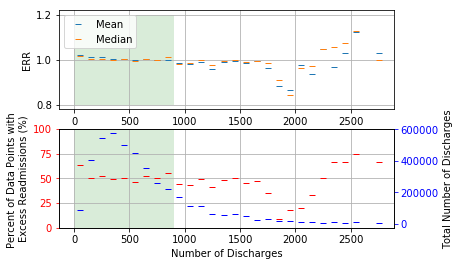

In [8]:
# bin the data by half-open intervals of 100
bins = np.arange(df.x.max() / 100 + 1) * 100
df['bin_index'] = np.digitize(df.x, bins)

# find the mean, median, % excess ERR, and total number of discharges for each bin
df_grouped = df.groupby('bin_index')
means = df_grouped['y'].mean()
medians = df_grouped['y'].median()
percent_excess = df_grouped['y'].apply(lambda x: np.sum(x > 1) / len(x)) * 100
number_discharges = df_grouped['x'].sum()

# plot the results
ax1 = plt.subplot(2,1,1)
plt.plot(means.index*100 - 50, means, marker='_', linestyle='none', label='Mean')
plt.plot(medians.index*100 - 50, medians, marker='_', linestyle='none', label='Median')
plt.grid()
plt.ylabel("ERR")
ax1.fill_between([0,900], 0.8, 1.2, facecolor='green', alpha = .15, interpolate=True)
plt.legend()
ax2 = plt.subplot(2,1,2)
plt.plot(percent_excess.index*100 - 50, percent_excess, color='r', marker='_', linestyle='none')
plt.ylim([0,100])
plt.grid()
plt.xlabel('Number of Discharges')
plt.ylabel('Percent of Data Points with \nExcess Readmissions (%)')
ax2.fill_between([0,900], 100, facecolor='green', alpha = .15, interpolate=True)
ax3 = plt.twinx()
plt.ylabel('Total Number of Discharges')
ax2.tick_params(axis='y', colors='r')
ax3.tick_params(axis='y', colors='b')
plt.plot(number_discharges.index*100 - 50, number_discharges, color='b', marker='_', linestyle='none')

The sample data was grouped into bins based on intervals of 100 discharges. The top plot shows the mean ERR and Median ERR for each bin.  The bottom plot shows the total number of discharges for each bin, as well as the percentage of data points in each bin that had Excess Readmissions (ERR > 1).  This percentage will be referred to as the Excess Readmissions Percentage (ERP).  Note that the ERP gives percentages with respect to the number of data points, not the total number of discharges.   

These plots indicate that data points with up to roughly 900 discharges have higher practical significance than the rest.  This region (highlighted in green) generally has higher mean and median ERRs than other regions, with the exception of data points with higher than 2,200 discharges.  The same trend is observed for ERPs.  Although the data points with more than 2,200 discharges tend to have higher ERRs and ERPs, they not considered practically significant because the number of discharges they contribute to the total is low.  The data points with fewer than 900 discharges are considered practically significant because they contribute a large number of discharges to the total. 

### Recommendations

This analysis indicates a negative correlation between ERR and the number of discharges.  The analysis also indicates that hospitals with fewer than 900 discharges contribute the most to the total number of discharges.  The threshold of 900 discharges is a conservative estimate, though it could be lowered if desired.  These results support the recommendation that further research should prioritize hospitals with fewer than 900 discharges.  This analysis does not examine causal relationships, and so it is recommended that further research explores the most important factors that influence ERRs.  


## Scatterplot Discussion

The scatterplot presented above in the Preliminary Report conveys useful information about the relationship between ERRs and the number of discharges.  The plot shows where the values are concentrated, and whether there are any trends between the two variables.  The disadvantage of the scatterplot is that there are many data points clustered closely together.  The points overlap in the plot, making it difficult to determine the number of data points in the dense regions.  

A more advantageous plot is a 2D density plot.  The hexagonal heatmap plot below shows the density of data points in more detail than the scatterplot.  The benefit of the heatmap is that it clearly displays regions with the highest density of data points.  The disadvantage is that the low density regions are difficult to visualize in detail.  

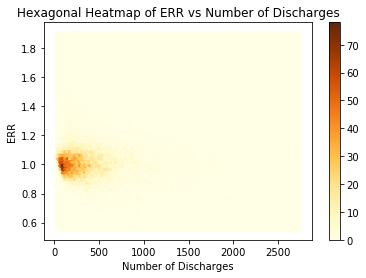

In [9]:
# plot the heatmap
ax = plt.hexbin(df.x, df.y, cmap='YlOrBr')
plt.colorbar()
plt.xlabel('Number of Discharges')
plt.ylabel('ERR')
plt.title('Hexagonal Heatmap of ERR vs Number of Discharges')

The 2D density plot indicates that the highest concentration of data points are in the region with fewer than 500 discharges.  The plot indicates that a large amount of data points in this region have ERR values greater than the threshold of 1.  This plot further supports the recommendation to examine hospitals with fewer than 900 discharges in more detail. 